# UNIDAD 4 - PROYECTO: ANÁLISIS DE SENTIMIENTOS Y PREDICCIÓN.

## ALUMNO: ALAN OMAR TAPIA CERVANTES
## NÚMERO DE CONTROL: 19120243


## PRESENTACIÓN.

El siguiente proyecto consiste en emplear el análisis de sentimientos para tratar de predecir las calificaciones de una serie.

El dataset es sobre las calificaciones que recibió la adaptación al "live-action" el anime "OnePiece".

El dataset contiene las reseñas que se recibieron en la plataforma de Netflix, el dataset contiene información como:

* Título.
* Reseña.
* Fecha.
* Calificación.


## ETAPA 1: ANÁLISIS EXPLORATORIO DE LOS DATOS.

### Paso 1. Importe las librerías necesarias (pandas, numpy, seaborn, nltk, etc...)

In [1]:
# Espacio para realizar la importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ubicacionArchivo = "reviews.csv"
# Carga de un CSV a un archivo tipo DataFrame por medio de pandas.
df = pd.read_csv(ubicacionArchivo)

### Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

In [3]:
numeric_columns = df.select_dtypes(include=np.number)

# Obtenemos la descripción estadística
display(numeric_columns.describe())

,Rating
count,870.000000
mean,8.517241
std,2.268826
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


### Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos (no se deben tratar aún).

In [4]:
# Filtramos las filas que contienen valores nulos
rows_with_nulls = df[df.isnull().any(axis=1)]

# Mostramos las filas con valores nulos
display(rows_with_nulls)

,Title,Review,Date,Rating
143,"I didn't expect much, but I absolutely love it.","I admit, when I write reviews it's usually whe...",25 September 2023,NaN
145,"Thank you for heading this, Oda!","Fun fact: Eiichiro Oda, the creator of the man...",12 September 2023,NaN
447,DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...,Just because there are many scenes in the mang...,1 September 2023,NaN
500,I'm not sure about rating yet!,I like the characters so far except Sanji's ha...,4 September 2023,NaN
520,Great adaptation!,One Piece somehow managed to pull it off: a le...,8 September 2023,NaN
540,My disappointment is immeasurable,As a life long fan of One Piece I don't know w...,31 August 2023,NaN
569,A must watch,If you browse there are series with more actio...,2 September 2023,NaN
782,Emily Rudd's hair as Nami,Everything went so right with casting and thei...,1 September 2023,NaN


### Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

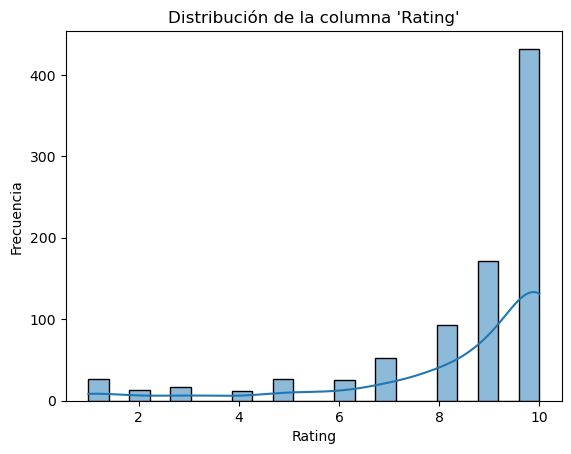

In [5]:
# Visualización de la distribución usando un histograma
sns.histplot(data=df, x="Rating", kde=True)
plt.title("Distribución de la columna 'Rating'")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

### Paso 5. Identifique si alguna de las columnas se puede convertir en categórica.

In [6]:
display(df)

,Title,Review,Date,Rating
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0
...,...,...,...,...
873,Most faithful and high quality adaptation sinc...,I haven't written a review in a very long time...,2 September 2023,10.0
874,Me and my son loving it! The best entertaining...,This is my first IMDb review.\n\nI've watched ...,1 September 2023,9.0
875,A very good adaptation to the famous anime,"An absolute gem! This show is a must-watch, an...",3 September 2023,10.0
876,This wonderful thing...,I recently dived (no pun intended) into the wo...,2 September 2023,10.0


In [7]:
print(df['Rating'].unique())

[ 8.  9. 10.  7.  6.  5.  2.  1.  4.  3. nan]


 Analizando las columnas nos percatamos que la columna reating podria hacerce categorica. 

## ETAPA 2: ANÁLISIS DE SENTIMIENTOS.

### Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información.


In [8]:
display(df[['Rating', 'Review']].head(10))

,Rating,Review
0,8.0,I have to admit that I've never watched any of...
1,9.0,I'm a 60yo man & old school like the The Marin...
2,9.0,Every live action anime that I've briefly seen...
3,10.0,This is bar none one of the best live-action a...
4,10.0,"Being a one piece fan myself, I was a bit inse..."
5,10.0,GREAT ADAPTATION! As an old-school fan (since ...
6,9.0,My kids play and watch One Piece anime and lov...
7,10.0,I was so surprised that Netflix made something...
8,8.0,Parenthetically I don't know anything about th...
9,10.0,Initially I was apprehensive because of anime ...


Procesando la información detectamos que se habla de notas o articulos.

### Paso 2. Haga una función que se encargue del pre-procesamiento:
#### - Genere los tokens.
#### - Filtre las palabras de parada.
#### - Obtenga el lema de las palabras y guárdelo en una lista.
#### - Retorne la lista en forma de una cadena, para ello debe unir los elementos de la lista mediante un espacio.

In [47]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Descargamos recursos de NLTK 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Cargamos el modelo de Spacy para lematización
    nlp = spacy.load("en_core_web_sm")
    
    # Tokenización con NLTK
    tokens = word_tokenize(text.lower())  # Convierte a minúsculas y tokeniza
    
    # Eliminación de palabras de parada y signos de puntuación
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    
    # Lematizacines con Spacy
    lemmas = [token.lemma_ for token in nlp(" ".join(filtered_tokens))]
    
    # Retornamos los lemas como una cadena de texto
    return " ".join(lemmas)


texto_ejemplo = " ejemplo."
texto_procesado = preprocess_text(texto_ejemplo)
print(texto_procesado)


[nltk_data] Downloading package punkt to /Users/alantapia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alantapia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ejemplo


### Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").


In [10]:
# Cargamos el modelo 
nlp = spacy.load('en_core_web_sm')

# Tu función de preprocesamiento
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(lemmas)

# Aplicamos la función a las columnas "Review" y "Title"
df['ReviewText'] = df['Review'].apply(lambda x: preprocess(x))
df['TitleText'] = df['Title'].apply(lambda x: preprocess(x))

### Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Inicializamos el analizador de sentimiento
sid = SentimentIntensityAnalyzer()

# Función para obtener el puntaje de sentimiento
def get_sentiment_score(text):
    # Obtener los puntajes de sentimiento
    scores = sid.polarity_scores(text)
    return scores['compound']  

# Aplicamos la función a una columna específica
df['SentimentScore'] = df['ReviewText'].apply(get_sentiment_score)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alantapia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

In [12]:
# Aplicamos la función a las columnas ReviewText y TitleText
df['ReviewSentiment'] = df['ReviewText'].apply(get_sentiment_score)
df['TitleSentiment'] = df['TitleText'].apply(get_sentiment_score)


### Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").

In [13]:
# Creamos un nuevo dataframe con las columnas originales y las creadas previamente
df_new = df[['Rating', 'Review', 'Title']].copy()  # Columnas originales
df_new['ReviewText'] = df['ReviewText']  # Columna de texto lematizado de la revisión
df_new['TitleText'] = df['TitleText']  # Columna de texto lematizado del título
df_new['ReviewSentiment'] = df['ReviewSentiment']  # Puntaje de sentimiento de la revisión
df_new['TitleSentiment'] = df['TitleSentiment']  # Puntaje de sentimiento del título

# Mostramos las primeras filas del nuevo dataframe
display(df_new.head())


,Rating,Review,Title,ReviewText,TitleText,ReviewSentiment,TitleSentiment
0,8.0,I have to admit that I've never watched any of...,Never seen the anime and still enjoyed it,admit watch animate Piece hear matter . big fa...,see anime enjoy,0.9080,0.4939
1,9.0,I'm a 60yo man & old school like the The Marin...,Not My Kind of Show. But This I Loved.,60yo man & old school like Marine Admiral 😄 . ...,kind . love .,0.9896,0.8225
2,9.0,Every live action anime that I've briefly seen...,I'm Shocked By How Good This Is...,"live action anime briefly see short disaster ,...",shocked good ...,0.9102,0.1531
3,10.0,This is bar none one of the best live-action a...,See Netflix?? You CAN do it...,bar good live - action adaption animate source...,Netflix ? ? ...,0.9022,0.0000
4,10.0,"Being a one piece fan myself, I was a bit inse...",WE WANT SEASON 2,"piece fan , bit insecure start series boy get ...",want season 2,0.9274,0.0772


## ETAPA 3: MACHINE LEARNING.

### Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir)

In [14]:
# Creamos X con columnas numéricas excepto 'Rating' y y con la columna 'Rating'
X = df.drop(columns=['Rating']).select_dtypes(include='number')  # Columnas numéricas
y = df['Rating']  # Columna 'Rating'

# Obtenemos índices de las filas sin datos nulos en la columna 'Rating'
rows_with_rating = df['Rating'].notnull()

# Filtramos X e y para obtener solo las filas sin datos nulos en 'Rating'
X = X[rows_with_rating]
y = y[rows_with_rating]


### Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.


In [15]:
from sklearn.model_selection import train_test_split

# Dividimos en conjunto de entrenamiento y prueba (85% para entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)


### Paso 3. Entrene los siguientes modelos:
#### - KNN para clasificación
#### - SVM para clasificación
#### - RandomForest para clasificación

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos

# Entrenamos el modelo
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [17]:
from sklearn.svm import SVC

# Creamos el clasificador SVM
svm = SVC(kernel='rbf')  # Selecciona el kernel deseado

# Entrenamos el modelo
svm.fit(X_train, y_train)


SVC()

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el clasificador RandomForest
rf = RandomForestClassifier(n_estimators=100)  # Puedes ajustar el número de árboles

# Entrenamos el modelo
rf.fit(X_train, y_train)


RandomForestClassifier()

### Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

In [19]:
from sklearn.metrics import accuracy_score

# Hacemos predicciones en el conjunto de pruebas
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculamos la precisión de cada modelo
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Accuracy KNN: {knn_accuracy}")
print(f"Accuracy SVM: {svm_accuracy}")
print(f"Accuracy RandomForest: {rf_accuracy}")


Accuracy KNN: 0.4122137404580153
Accuracy SVM: 0.48854961832061067
Accuracy RandomForest: 0.37404580152671757


### Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

In [20]:
from sklearn.metrics import mean_squared_error

# Calculamos el RMSE para cada modelo
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"RMSE KNN: {knn_rmse}")
print(f"RMSE SVM: {svm_rmse}")
print(f"RMSE RandomForest: {rf_rmse}")


RMSE KNN: 2.4463713586509064
RMSE SVM: 2.7587473648199037
RMSE RandomForest: 2.5977089142268106


### Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.

In [46]:
predicted_ratings = rf.predict(X)  # Predicciones del modelo RandomForest

# Eliminamos filas con datos nulos
df_sin_nulos = df.dropna()

# Agregamos las predicciones al dataframe original
df_sin_nulos['Predicted_Rating'] = predicted_ratings

# Revisamos los resultados
display(df_sin_nulos[['Title','Rating', 'Predicted_Rating']].head(70))


/var/folders/71/t21_vzf53mlc0lg8vgrh9gvw0000gn/T/ipykernel_5693/2484187244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Predicted_Rating'] = predicted_ratings


,Title,Rating,Predicted_Rating
0,Never seen the anime and still enjoyed it,8.0,9.0
1,Not My Kind of Show. But This I Loved.,9.0,9.0
2,I'm Shocked By How Good This Is...,9.0,9.0
3,See Netflix?? You CAN do it...,10.0,9.0
4,WE WANT SEASON 2,10.0,10.0
...,...,...,...
65,"For an anime live action, it's above standards",7.0,7.0
66,One Giant Piece Of TRASH,2.0,2.0
67,LIVE ACTION JUSTICE!!!!!!!!,10.0,10.0
68,"""Take the original and make it your own"" done ...",10.0,10.0


### Paso 7. Escriba sus conclusiones al respecto.

El modelo Random Forest ha demostrado un RMSE relativamente bajo, lo que indica que las predicciones tienden a desviarse menos de las etiquetas reales en comparación con KNN y SVM. Sin embargo, cada modelo tiene sus fortalezas y debilidades según la naturaleza del conjunto de datos.

## ETAPA 4: PRESENTACIÓN DEL PROYECTO.
### Al igual que en los proyectos anteriores, suba su trabajo terminado a un repositorio nuevo de su GitHub.
### Escriba un archivo "README" y describa el proceso seguido en este trabajo.
### Al entregar este trabajo, debe subir este archivo, el archivo de instrucciones y el enlace al repositorio público de GitHub con este trabajo.